In [192]:
import pandas as pd
import numpy as np
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.



**Battle of the Neighborhoods**

**By Melanie Johnson**

**This is a Coursera Project from IBM Applied Data Science Capstone.  The project includes manipulation of data in a Jupyter notebook using Python code.  The Denver crime data csv report was obtained for free from https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-crime and uploaded in IBM Watson Studio to this notebook. Part of the assignment is to also incorporate API data from Foursquare.com to import venues that will be usesd to solve a problem that could be useful to organizations.

The dataset includes data from 2015-2019 containing 460,032 lines of data with 267 types of offenses.  Given the robust data, the data was filtered to only show 2019 crimes and these offenses were then combined into like offenses. Then many fields, such as counterfeiting, forgery, drug related crimes, were filtered out to narrow the offense type categories from 267 to the 21 types so that the information is not so overwhelming and is easier to understand.  

Denver Health Medical Center recruits and hires health professionals from outside Colorado and they find that when they offer positions to people, the candidates asked about where they should look to live based on crime rates and for popular restaurants and entertainment in the area.

We will now upload the csv file to IBM Watson Studio for data manipulation.

In [7]:
# The code was removed by Watson Studio for sharing.

INCIDENT_ID    OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0  2.018160e+09  2.020000e+15          1311                       0   
1  2.018316e+08  2.020000e+14          1311                       0   
2  2.018237e+09  2.020000e+15          1311                       0   
3  2.018227e+09  2.020000e+15          1311                       0   
4  2.018341e+09  2.020000e+15          1311                       0   

  OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID FIRST_OCCURRENCE_DATE  \
0         Assault    all-other-crimes              3/8/2018   
1         Assault    all-other-crimes             1/14/2018   
2         Assault    all-other-crimes              4/9/2018   
3         Assault    all-other-crimes              4/5/2018   
4         Assault    all-other-crimes             5/21/2018   

  LAST_OCCURRENCE_DATE    REPORTED_DATE    INCIDENT_ADDRESS      GEO_X  \
0       3/8/2018 13:40   3/8/2018 17:35    490 W COLFAX AVE  3142418.0   
1                  NaN   1/14/2018 2:44  66 N SHERIDAN BLVD  3125804.0   
2                  NaN   4/10/2018 2:28       515 PARK AVEW  3145608.0   
3                  NaN    4/6/2018 1:15    777 N BANNOCK ST  3143312.0   
4                  NaN  5/21/2018 17:29    490 W COLFAX AVE  3142418.0   

       GEO_Y     GEO_LON    GEO_LAT  DISTRICT_ID  PRECINCT_ID NEIGHBORHOOD_ID  \
0  1694739.0 -104.993574  39.739773            6          611    civic-center   
1  1686609.0 -105.052793  39.717694            4          411     barnum-west   
2  1698768.0 -104.982149  39.750784            6          621     five-points   
3  1690483.0 -104.990480  39.728076            1          123    lincoln-park   
4  1694739.0 -104.993574  39.739773            6          611    civic-center   

   IS_CRIME  IS_TRAFFIC  
0         1           0  
1         1           0  
2         1           0  
3         1           0  
4         1           0

In [372]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

**The data set includes many columns that will not be necessary to this project.  Therefore, using the drop function, we will remove them from our data frame.**

In [8]:
df=df_data_0
df.drop(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'INCIDENT_ADDRESS', 'IS_CRIME', 'IS_TRAFFIC', 'OFFENSE_CATEGORY_ID', 'REPORTED_DATE', 'FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'GEO_X', 'GEO_Y', 'PRECINCT_ID', 'DISTRICT_ID'], axis=1, inplace=True)
df.head(2)

OFFENSE_TYPE_ID     GEO_LON    GEO_LAT NEIGHBORHOOD_ID
0         Assault -104.993574  39.739773    civic-center
1         Assault -105.052793  39.717694     barnum-west

**The next step is to rename the columns to better describe the data for this project:**

In [9]:
df.rename(columns={'OFFENSE_TYPE_ID': 'Crime', 'NEIGHBORHOOD_ID': 'Neighborhood', 'GEO_LON': 'Longitude', 'GEO_LAT': 'Latitude'}, inplace=True)
df.head(2)

Crime   Longitude   Latitude  Neighborhood
0  Assault -104.993574  39.739773  civic-center
1  Assault -105.052793  39.717694   barnum-west

**Now the columns containing NAN will be dropped from the dataframe.  It was determined that there is enough data for the project and it is not a significant loss of data.**

In [13]:
df.dropna(subset = ['Latitude'], inplace=True)
df.dropna(subset = ['Longitude'], inplace=True)

In [12]:
df.shape

(159037, 4)

**Next I will add a "Total" index to the "Y" dataframe and call it "df2" and then we will list the top five highest crime neighborhoods:**

In [165]:
df.Neighborhood.value_counts()
df2=pd.DataFrame(Y.values, index=Y.index, columns=['Total'])
df2.head(5)

Total
five-points     9698
stapleton       7804
cbd             6624
capitol-hill    5472
union-station   5194

**Now we will count the number of Denver neighborhoods listed in the dataframe.**

In [374]:
print('The dataframe has {} neighborhoods.'.format(
        len(df['Neighborhood'].unique()),
        df.shape[0]
    )
)

The dataframe has 78 neighborhoods.


**The dataframe "df2" has been sorted in descending order and the neighborhoods with the lowest total crimes were listed, you can see there is a significant drop in crime rates from the top five crime total neighborhoods.**

In [21]:
df2.tail(5)

Total
skyland         590
rosedale        562
country_club    407
wellshire       255
indian_creek    245

**The complete dataframe has been filtered to obtain the total crime offenses by type and a Total index added for clarification and visualization:**

In [15]:
X=df.Crime.value_counts()
df1=pd.DataFrame(X.values, index=X.index, columns=['Total'])
df1

Total
Theft                  70288
Assault                29456
Burglary               22386
Shoplifting            12845
Weapon-Violent          7540
Robbery                 5272
Injury Threats          5018
Weapon-Non-Violent      1841
Harassment              1572
Car-jacking              621
Arson                    545
Sexual Harassment        341
Homicide                 272
Stalking                 237
Kidnap-Adult             199
Kidnap                   165
Bomb-threats             156
Bank Robbery             135
Window-peeping            98
Explosives Possession     35
Explosives Use            15

In [16]:
df1.shape

(21, 1)

**Now the crimes are displayed in a bar chart format which makes it visually easier to see the top crimes committed in Denver**

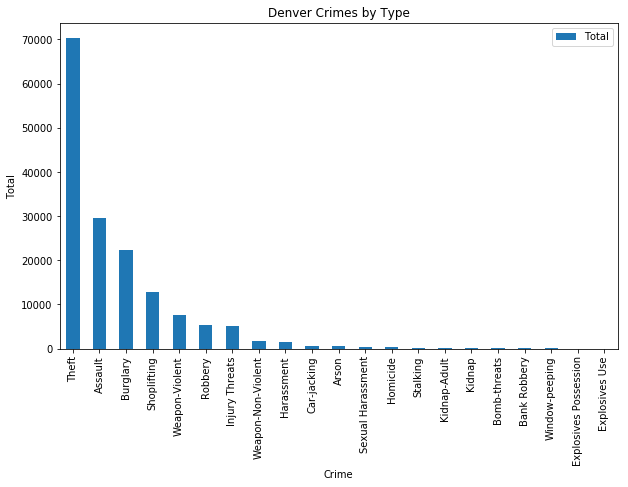

In [377]:
df1.plot(kind='bar', figsize=(10,6))

plt.xlabel('Crime')
plt.ylabel('Total')
plt.title('Denver Crimes by Type')

plt.show()

**Now we will filter the data to list the top 5 crimes in Denver**

In [378]:
df1.sort_values(by='Total', ascending=False, inplace=True)
df1_top5 = df1['Total'].head(5)
df1_top5

Theft             70288
Assault           29456
Burglary          22386
Shoplifting       12845
Weapon-Violent     7540
Name: Total, dtype: int64

**Conversely, the data is now listed with the five least committed crimes in Denver.  While this is not a pertinent to the report, it is still interesting.** 

In [379]:
df1.sort_values(by='Total', ascending=False, inplace=True)
df1_bottom5 = df1['Total'].tail(5)
df1_bottom5

Bomb-threats             156
Bank Robbery             135
Window-peeping            98
Explosives Possession     35
Explosives Use            15
Name: Total, dtype: int64

**The latitude and longitude data will now be converted to floats for later mapping:**

In [22]:
df['Latitude']=df['Latitude'].astype(float)
df['Longitude']=df['Longitude'].astype(float)
df = pd.DataFrame(df)
print('We have {} rows'.format(len(df)))
str(df.columns.tolist())

We have 159037 rows


"['Crime', 'Longitude', 'Latitude', 'Neighborhood']"

**The crimes will now be sorted by neighborhood listing the crime types in each neighborhood:**

In [200]:
df.groupby(['Neighborhood','Crime']).count()

Longitude  Latitude
Neighborhood Crime                                  
athmar-park  Arson                       9         9
             Assault                   360       360
             Bomb-threats                1         1
             Burglary                  267       267
             Car-jacking                23        23
             Harassment                 10        10
             Homicide                    5         5
             Injury Threats             57        57
             Kidnap-Adult                7         7
             Robbery                    73        73
             Sexual Harassment           1         1
             Shoplifting                70        70
             Stalking                    4         4
             Theft                     769       769
             Weapon-Non-Violent         26        26
             Weapon-Violent            155       155
             Window-peeping              2         2
auraria      Arson                       4         4
             Assault                   230       230
             Bomb-threats                1         1
             Burglary                   86        86
             Car-jacking                 4         4
             Harassment                 33        33
             Injury Threats             52        52
             Kidnap                      1         1
             Kidnap-Adult                1         1
             Robbery                    28        28
             Sexual Harassment           4         4
             Shoplifting                25        25
             Stalking                    4         4
...                                    ...       ...
whittier     Assault                   263       263
             Burglary                  164       164
             Car-jacking                 3         3
             Harassment                  9         9
             Homicide                    3         3
             Injury Threats             35        35
             Kidnap                      3         3
             Robbery                    31        31
             Sexual Harassment           5         5
             Shoplifting                 3         3
             Stalking                    1         1
             Theft                     415       415
             Weapon-Non-Violent         20        20
             Weapon-Violent            147       147
windsor      Arson                       4         4
             Assault                   326       326
             Burglary                  249       249
             Car-jacking                 3         3
             Harassment                 21        21
             Homicide                    2         2
             Injury Threats             58        58
             Kidnap                      3         3
             Kidnap-Adult                1         1
             Robbery                    30        30
             Sexual Harassment           5         5
             Shoplifting                43        43
             Stalking                    2         2
             Theft                     705       705
             Weapon-Non-Violent          2         2
             Weapon-Violent             40        40

[1322 rows x 2 columns]

**Now each of the five neighborhoods with the lowest crime rate will be displayed showing the types and totals of each crime.**

In [173]:
skyland = df[df.Neighborhood.str.contains('skyland')]
skyland.groupby(['Neighborhood','Crime']).count()

Longitude  Latitude
Neighborhood Crime                                  
skyland      Arson                       4         4
             Assault                    93        93
             Burglary                  129       129
             Car-jacking                 4         4
             Harassment                  5         5
             Homicide                    4         4
             Injury Threats             16        16
             Kidnap-Adult                1         1
             Robbery                    24        24
             Sexual Harassment           2         2
             Shoplifting                 1         1
             Theft                     223       223
             Weapon-Non-Violent          4         4
             Weapon-Violent             80        80

In [174]:
rosedale = df[df.Neighborhood.str.contains('rosedale')]
rosedale.groupby(['Neighborhood','Crime']).count()

Longitude  Latitude
Neighborhood Crime                                  
rosedale     Assault                    82        82
             Bomb-threats                1         1
             Burglary                  156       156
             Car-jacking                 1         1
             Harassment                  3         3
             Injury Threats             13        13
             Robbery                    15        15
             Sexual Harassment           3         3
             Shoplifting                 5         5
             Theft                     278       278
             Weapon-Non-Violent          2         2
             Weapon-Violent              3         3

In [175]:
country_club = df[df.Neighborhood.str.contains('country_club')]
country_club.groupby(['Neighborhood','Crime']).count()

Longitude  Latitude
Neighborhood Crime                                  
country_club Assault                    13        13
             Burglary                  150       150
             Car-jacking                 1         1
             Harassment                  1         1
             Injury Threats              9         9
             Robbery                     7         7
             Shoplifting                12        12
             Stalking                    2         2
             Theft                     208       208
             Weapon-Non-Violent          1         1
             Weapon-Violent              3         3

In [176]:
wellshire = df[df.Neighborhood.str.contains('wellshire')]
wellshire.groupby(['Neighborhood','Crime']).count()

Longitude  Latitude
Neighborhood Crime                                 
wellshire    Assault                   17        17
             Burglary                  72        72
             Car-jacking                1         1
             Harassment                 3         3
             Injury Threats             5         5
             Robbery                    1         1
             Sexual Harassment          1         1
             Shoplifting                1         1
             Stalking                   1         1
             Theft                    149       149
             Weapon-Violent             3         3
             Window-peeping             1         1

In [177]:
indian_creek = df[df.Neighborhood.str.contains('indian_creek')]
indian_creek.groupby(['Neighborhood','Crime']).count()

Longitude  Latitude
Neighborhood Crime                                  
indian_creek Assault                    25        25
             Burglary                   44        44
             Harassment                  6         6
             Homicide                    1         1
             Injury Threats              2         2
             Robbery                     5         5
             Sexual Harassment           1         1
             Theft                     155       155
             Weapon-Non-Violent          1         1
             Weapon-Violent              5         5

**Now we will list the Denver geographical coordinates listed on www.latlong.net/place/denver-co-usa-3174.html:**

In [23]:
latitude= 39.742043
longitude = -104.991531

**Now a clean map of denver will be displayed for reference.  This map is interactive, so you can zoom in to get a better look at the Denver area:**

In [193]:
denver_map = folium.Map(location=[latitude, longitude], zoom_start=12)
denver_map

**Since there are 159,037 crimes in the filtered data, it is difficult to visualize this information on a map, so the data will be filtered to obtain 1,000 random crimes with their latitude and longitude and neighborhood.**

In [26]:
import random
import numpy as np
rows = np.random.choice(df.index.values, 1000)
df1000 = df.loc[rows]
df1000.head()

Crime   Longitude   Latitude   Neighborhood
111544           Theft -105.003714  39.741977        auraria
161939  Weapon-Violent -105.004252  39.731187   lincoln-park
117393           Theft -104.999629  39.751365  union-station
26039          Assault -104.991430  39.742111            cbd
82436            Theft -104.991086  39.755270    five-points

**Now we confirm that we have 1,000 random crimes with our four columns:**

In [158]:
df1000.shape

(1000, 4)

**Now we will map the random crimes and transpose them on the Denver map.  You can click on each circle to see the type of crime reported at that location.**

In [194]:
# create map and display it
denver_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 1000 crimes and add each to the map
for lat, lng, label in zip(df1000.Latitude, df1000.Longitude, df1000.Crime):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(denver_map)

# show map
denver_map

**As you can see, the 1,000 crimes we map create almost a blob look over Denver, so we will cluster the crimes using group markers. This is visually easier to look at and obtain usable information. As you zoom in, the markers will expand to show the specific crime.  You can also see that the majority of the 1,000 crimes are located closer to Denver's city center:**

In [195]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
denver_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(denver_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df1000.Latitude, df1000.Longitude, df1000.Crime):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
denver_map

**Now we will map each of the neighborhoods with the least amount of crime, but first, we have to define and call out these neighborhoods:**

**Skyland is the first neighborhood called out to be mapped.  This neighborhood's crime count was the highest of the five neighborhoods at 590 reported crimes in 2019:**

In [30]:
skyland= df[(df['Neighborhood']=='skyland')]
skyland.head()

Crime   Longitude   Latitude Neighborhood
571   Assault -104.948545  39.760127      skyland
958   Assault -104.947119  39.760486      skyland
1349  Assault -104.957326  39.760736      skyland
1439  Assault -104.946482  39.756958      skyland
1554  Assault -104.943799  39.755240      skyland

**We will use the same grouping format used above for the 1,000 random crimes to make it visually easier to see the crimes at a glance.  Recall that the map is interactive and you can zoom closer to see which crimes were committed in this area.**

In [196]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
denver_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(denver_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(skyland.Latitude, skyland.Longitude, skyland.Crime):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
denver_map

**The next neighborhood is Rosedale with 562 crimes reported in 2019:**

In [32]:
rosedale= df[(df['Neighborhood']=='rosedale')]
rosedale.head()

Crime   Longitude   Latitude Neighborhood
1304  Assault -104.974901  39.670054     rosedale
1521  Assault -104.974901  39.670054     rosedale
1960  Assault -104.987211  39.670443     rosedale
2147  Assault -104.987167  39.676395     rosedale
3004  Assault -104.974901  39.670054     rosedale

In [197]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
denver_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(denver_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(rosedale.Latitude, rosedale.Longitude, rosedale.Crime):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
denver_map

**The next neighborhood is Country-Club with 407 crimes reported in 2019:**

In [34]:
country_club= df[(df['Neighborhood']=='country_club')]
country_club.head()

Crime   Longitude   Latitude  Neighborhood
3296   Assault -104.960183  39.727317  country_club
5331   Assault -104.972630  39.728785  country_club
5437   Assault -104.970337  39.725513  country_club
7385   Assault -104.971441  39.719531  country_club
14404  Assault -104.971745  39.718363  country_club

In [198]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
denver_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(denver_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(country_club.Latitude, country_club.Longitude, country_club.Crime):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
denver_map

**The Wellshire neighborhood had 255 crimes reported in 2019:**

In [44]:
wellshire= df[(df['Neighborhood']=='wellshire')]
wellshire.head()

Crime   Longitude   Latitude Neighborhood
1671  Assault -104.947848  39.654317    wellshire
4529  Assault -104.941021  39.660245    wellshire
5228  Assault -104.946702  39.660911    wellshire
6898  Assault -104.942238  39.662247    wellshire
7478  Assault -104.945690  39.660984    wellshire

In [199]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
denver_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(denver_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(wellshire.Latitude, wellshire.Longitude, wellshire.Crime):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
denver_map

**Finally, the Indian-Creek is neighborhood with the least amount of crime reported, 245 in 2019:**

In [46]:
indian_creek= df[(df['Neighborhood']=='indian_creek')]
indian_creek.head()

Crime   Longitude   Latitude  Neighborhood
6394  Assault -104.894030  39.684753  indian_creek
8529  Assault -104.891123  39.683599  indian_creek
9251  Assault -104.893117  39.685168  indian_creek
9429  Assault -104.893950  39.683418  indian_creek
9968  Assault -104.902400  39.689177  indian_creek

In [ ]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
denver_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(denver_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(indian_creek.Latitude, indian_creek.Longitude, indian_creek.Crime):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
denver_map

**Now that we have narrowed our search to the five Denver neighborhoods with the lowest crime rates, we will now search for venues surrounding Denver Health Medical Center so that the candidates can see the types of venues offered in the surrounding area.  First we will import the appropriate Python liabraries to handle the Geo data and JSON files**

In [48]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


**We will use Fourscqure API service and then limit the number of venues supplied by Foursquare to 100 and make the radius 500 to display venues surrounding our Denver Neighborhoods. The Foursquare app is available to the general public for use.  Since I am using Python to obtain the data from this source, I had to obtain developer credentials for this service.**

**Now I will apply Foursquare API Credentials as well as the Denver Health Medical Center geographical location coordinates to pull up the venues, please note that some of the cells should be hidden in published version of this notebook.**

In [154]:
# The code was removed by Watson Studio for sharing.

In [155]:
address = '777 Bannock St, Denver, CO' 
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print(latitude, longitude)

39.72731935 -104.99119835138615


**Now, we will ask Foursquare to obtain 100 venues around the Denver Health Medical Center and show the URL output:**

In [156]:

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=BRW55CK03C5LXOUNJ3MJUCWVXKX1ELBTZ1RBASYBL1MI2C10&client_secret=ANEBK55RG0BDCEGI4BKGGTQZQ2C4HSKBVCTG5FMQVVHNSMXM&v=20200126&ll=39.72731935,-104.99119835138615&radius=1000&limit=100'

**We will now the data and URL through Foursquare and print the results in a JSON file format**

In [157]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e2e0bd00de0d9001bd7285a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lincoln Park',
  'headerFullLocation': 'Lincoln Park, Denver',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 140,
  'suggestedBounds': {'ne': {'lat': 39.736319359000014,
    'lng': -104.97951812179262},
   'sw': {'lat': 39.71831934099999, 'lng': -105.00287858097967}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4de00e0352b1c1b3ce28d061',
       'name': 'Cherry Creek Trail',
       'location': {'address': 'from Denver',
        'crossStreet': 'to Douglas County',
        'lat': 39.72896805218403,
        'lng'

**The data from the venue search json file will now be extracted to list the name, category and geographical coordinates of each venue:**

In [158]:

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [159]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name          categories        lat         lng
0       Cherry Creek Trail               Trail  39.728968 -104.989567
1  Lowdown Brewery+Kitchen             Brewery  39.729278 -104.985969
2          Pizzeria Locale         Pizza Place  39.725250 -104.987170
3   Chipotle Mexican Grill  Mexican Restaurant  39.725487 -104.987017
4                      evo            Ski Shop  39.730269 -104.987025

**Now the venues will be sorted by category in a list that the Denver Health Medical Center can publish to give to employees and visitors to the hospital. The venues can easily be searched on mobile devices with search engines such as Google Maps:**

In [181]:
nearby_venues.sort_values(by='categories', ascending=False, inplace=True)
nearby_venues.head(30)

name          categories        lat  \
58                           The River         Yoga Studio  39.735743   
20                      CorePower Yoga         Yoga Studio  39.720805   
8               MAX's Wine Dive Denver            Wine Bar  39.727093   
0                   Cherry Creek Trail               Trail  39.728968   
19                  The Wizard's Chest    Toy / Game Store  39.723668   
87                           Su Teatro             Theater  39.727843   
74                      Bronzed Denver       Tanning Salon  39.736169   
11               Tacos Tequila Whiskey          Taco Place  39.727476   
16                      Torchy's Tacos          Taco Place  39.733490   
26                          Red Ginger    Sushi Restaurant  39.725264   
85              Stoney's Bar and Grill          Sports Bar  39.734274   
73                        Eden Day Spa                 Spa  39.733642   
36             The Station Hair Studio                 Spa  39.734216   
37    Studio; A Collective Of Stylists                 Spa  39.734519   
64                      Illuzion Glass          Smoke Shop  39.720131   
4                                  evo            Ski Shop  39.730269   
61                ZEPS Epiq Sandwiches      Sandwich Place  39.735006   
45                  Jersey Mike's Subs      Sandwich Place  39.725090   
29                             Parsley      Sandwich Place  39.733958   
6                     City Bakery Cafe      Sandwich Place  39.727803   
24                   Proper Barbershop  Salon / Barbershop  39.729119   
70      Namaste An Aveda Concept Salon  Salon / Barbershop  39.718802   
15              Zandi K Denver Central  Salon / Barbershop  39.725550   
55                  Adorn Salon Denver  Salon / Barbershop  39.720191   
93                     Cap City Tavern                 Pub  39.736288   
25                       Cosmo's Pizza         Pizza Place  39.725069   
2                      Pizzeria Locale         Pizza Place  39.725250   
91  Cow Sculpture at Denver Art Museum   Outdoor Sculpture  39.735930   
51                   Noodles & Company        Noodle House  39.725376   
80                          The Church           Nightclub  39.735245   

           lng  
58 -104.992752  
20 -104.987781  
8  -104.984499  
0  -104.989567  
19 -104.987847  
87 -104.998884  
74 -104.992698  
11 -104.984587  
16 -104.987822  
26 -104.986981  
85 -104.986280  
73 -104.988458  
36 -104.992604  
37 -104.990445  
64 -104.987351  
4  -104.987025  
61 -104.987839  
45 -104.988101  
29 -104.991829  
6  -104.985999  
24 -104.984858  
70 -104.987671  
15 -104.997440  
55 -104.987518  
93 -104.990525  
25 -104.983255  
2  -104.987170  
91 -104.988719  
51 -104.987020  
80 -104.985891

In [162]:
print('There are {} businesses close to Denver Health Medical Center.'.format(len(nearby_venues['categories'].unique())))

There are 60 businesses close to Denver Health Medical Center.
